<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fjeahyuk/jeahyuk/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_(%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [4]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.97MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [5]:
!ls

Fish.csv  fish-market.zip  sample_data


In [6]:
df = pd.read_csv('Fish.csv')

In [105]:
y=df['Species']
X=df.drop(['Species'],axis=1)

In [117]:
df1=df[(df['Species']=='Perch')]
X=df1[['Weight','Length1']]

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [119]:
X

array([[-1.09242171, -2.14922519],
       [-1.01665974, -1.55993509],
       [-0.99343768, -1.40671966],
       [-0.96005596, -1.26529003],
       [-0.90635495, -1.18278942],
       [-0.81927222, -1.12386041],
       [-0.88313289, -1.0531456 ],
       [-0.87732737, -1.00600239],
       [-0.86281359, -0.93528758],
       [-0.86281359, -0.88814437],
       [-0.79024465, -0.79385795],
       [-0.77573086, -0.79385795],
       [-0.74670328, -0.79385795],
       [-0.73218949, -0.75850055],
       [-0.76121707, -0.67599993],
       [-0.76121707, -0.67599993],
       [-0.73218949, -0.67599993],
       [-0.71767571, -0.67599993],
       [-0.79024465, -0.67599993],
       [-0.73218949, -0.61707092],
       [-0.67413434, -0.61707092],
       [-0.68864813, -0.59349932],
       [-0.67413434, -0.55814191],
       [-0.61607919, -0.4992129 ],
       [-0.45642753, -0.44028389],
       [-0.68864813, -0.44028389],
       [-0.56382956, -0.36956908],
       [-0.58705162, -0.32242587],
       [-0.53770474,

In [114]:
X=X['Length1']
y=X['Weight']

KeyError: ignored

##1

In [83]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [84]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 정규방정식

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [96]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: generated_data_plot


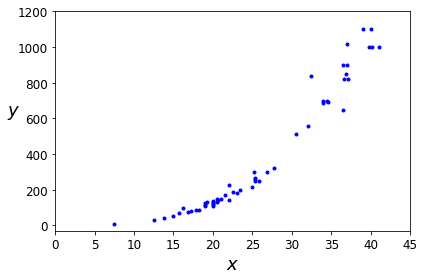

In [97]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 45, -30, 1200])
save_fig("generated_data_plot")
plt.show()

In [90]:
X_b = np.c_[np.ones((56, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [91]:
theta_best

array([[-619.17511438],
       [  38.91146711]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [58]:
X_new = np.array([[10], [40]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([-230.06044324,  937.2835702 ])

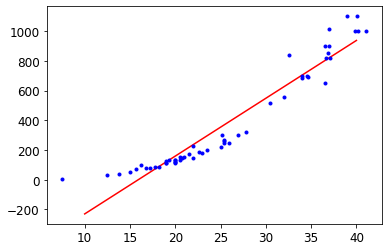

In [59]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

그림 저장: linear_model_predictions_plot


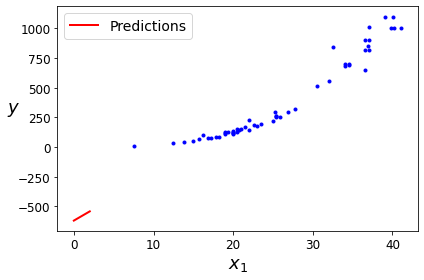

In [49]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
save_fig("linear_model_predictions_plot")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/mnt/disks/sdb/github/hg-mldl/.env/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

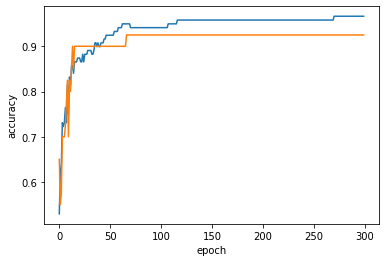

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
